In [1]:
%pip install seaborn
%pip install matplotlib
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline 


In [5]:
CLASSES = ["non demented" , "very mild demented" , "mild demented", "moderate demented"]
IMAGESIZE = 224

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up your ImageDataGenerator with normalization (rescaling)
traindata_gen = ImageDataGenerator(
    rescale=1.0/255.0  # Normalize pixel values to the range [0, 1]
)

# Load your training data
traindata = traindata_gen.flow_from_directory(
    directory="data/train",
    target_size=(224, 224),  # Resize images to the desired dimensions
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    classes=CLASSES,  # Specify the class names
)

# Set up the test/dev data generator with the same normalization
testdata_gen = ImageDataGenerator(
    rescale=1.0/255.0
)

# Load your validation data
devdata = testdata_gen.flow_from_directory(
    directory="data/dev",
    target_size=(224, 224),  # Ensure consistent image size
    class_mode='categorical',  # Class mode should match the training setup
    classes=CLASSES,
)

Found 30467 images belonging to 4 classes.
Found 6528 images belonging to 4 classes.


In [7]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

# Hyperparameters
EPOCHS = 40
LEARNING_RATE = 0.0001
BATCH_SIZE = 32
INPUT_SHAPE = (224, 224, 3)  # Required input for DenseNet
NUM_CLASSES = 4  # Adjust based on your dataset

# Load Pre-trained DenseNet121
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=INPUT_SHAPE)
base_model.trainable = False  # Freeze pre-trained layers for transfer learning

# Build the Model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Convert feature maps to 1D
    
    # Add Fully Connected and Dropout layers
    Dense(256, activation='relu'),
    Dropout(0.5),  # Dropout for regularization
    Dense(NUM_CLASSES, activation='softmax')  # Output layer
])

# Compile the Model
model.compile(
    optimizer=Adam(learning_rate=LEARNING_RATE),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [8]:
# Train the Model
history = model.fit(
    traindata,
    validation_data=devdata,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE
)

c:\Users\NET-PC\.conda\envs\pytorch_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
953/953 ━━━━━━━━━━━━━━━━━━━━ 2165s 2s/step - accuracy: 0.5334 - loss: 1.0288 - val_accuracy: 0.6347 - val_loss: 0.8144
Epoch 2/40
953/953 ━━━━━━━━━━━━━━━━━━━━ 2455s 3s/step - accuracy: 0.6081 - loss: 0.8369 - val_accuracy: 0.6515 - val_loss: 0.7647
Epoch 3/40
953/953 ━━━━━━━━━━━━━━━━━━━━ 2127s 2s/step - accuracy: 0.6257 - loss: 0.7987 - val_accuracy: 0.6687 - val_loss: 0.7382
Epoch 4/40
953/953 ━━━━━━━━━━━━━━━━━━━━ 2127s 2s/step - accuracy: 0.6443 - loss: 0.7604 - val_accuracy: 0.6857 - val_loss: 0.6869
Epoch 5/40
953/953 ━━━━━━━━━━━━━━━━━━━━ 2125s 2s/step - accuracy: 0.6639 - loss: 0.7292 - val_accuracy: 0.7047 - val_loss: 0.6595
Epoch 6/40
953/953 ━━━━━━━━━━━━━━━━━━━━ 2249s 2s/step - accuracy: 0.6772 - loss: 0.7069 - val_accuracy: 0.7050 - val_loss: 0.6524
Epoch 7/40
953/953 ━━━━━━━━━━━━━━━━━━━━ 3148s 3s/step - accuracy: 0.6877 - loss: 0.6831 - val_accuracy: 0.7158 - val_loss: 0.6219
Epoch 8/40
953/953 ━━━━━━━━━━━━━━━━━━━━ 1822s 2s/step - accuracy: 0.6959 - loss: 0.6704 - 

In [9]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


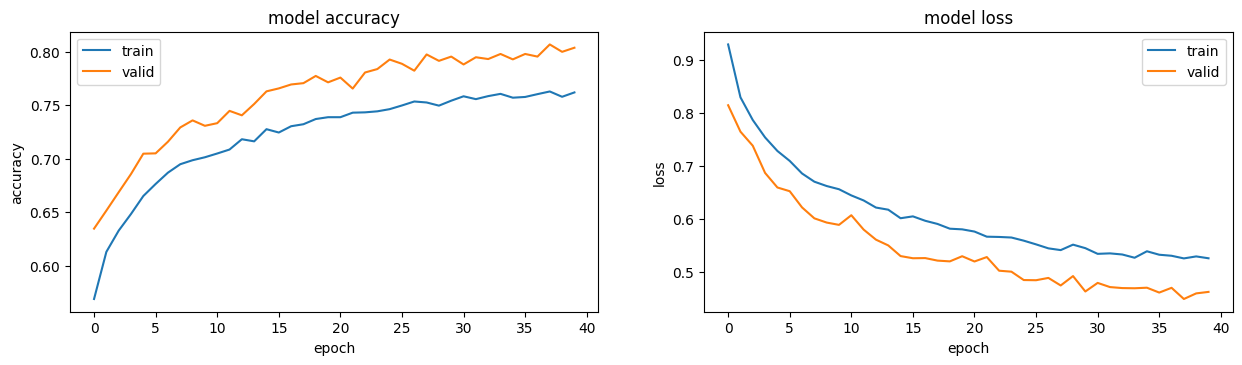

In [11]:
import matplotlib.pyplot as plt

plt.figure(1, figsize = (15,8)) 
    
plt.subplot(221)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 
    
plt.subplot(222)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 

plt.show()

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up the ImageDataGenerator for testing (with normalization only)
testingData = ImageDataGenerator(
    rescale=1.0/255.0  # Normalize pixel values to [0, 1]
)

# Load your test data
testdata = testingData.flow_from_directory(
    directory="data/test",
    target_size=(224, 224),  # Resize images to the desired dimensions
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    classes=CLASSES  # Specify the class names
)


Found 6531 images belonging to 4 classes.


In [13]:
modelName = "My4wayAD.keras";
model.save(modelName);

Found 6531 images belonging to 4 classes.


c:\Users\NET-PC\.conda\envs\pytorch_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


205/205 ━━━━━━━━━━━━━━━━━━━━ 200s 950ms/step - accuracy: 0.7462 - loss: 0.5378
Accuracy: 0.8026335835456848
205/205 ━━━━━━━━━━━━━━━━━━━━ 202s 968ms/step
Confusion Matrix
[[1396  334   96    4]
 [ 258 1233  192    4]
 [  66  247 1243    4]
 [   1   39   44 1370]]
Precision: 0.8083746937355415
Sensitivity (Recall): 0.8026335936303782
Error Rate: 0.19736641645431519
Classification Report
                    precision    recall  f1-score   support

      non demented       0.81      0.76      0.79      1830
very mild demented       0.67      0.73      0.70      1687
     mild demented       0.79      0.80      0.79      1560
 moderate demented       0.99      0.94      0.97      1454

          accuracy                           0.80      6531
         macro avg       0.81      0.81      0.81      6531
      weighted avg       0.81      0.80      0.80      6531



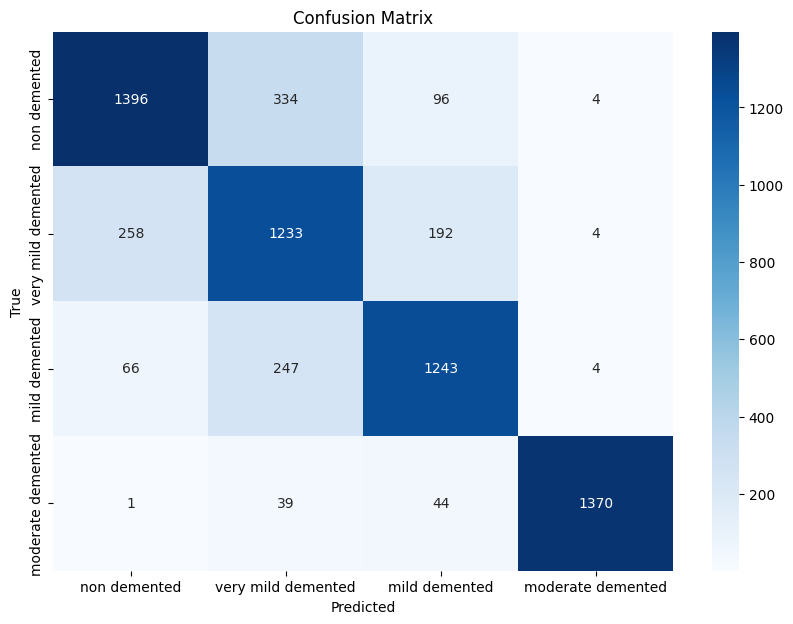

In [14]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load your pre-trained model
model = tf.keras.models.load_model(modelName)

# Create the test data generator
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Specify the path to your test set
test_generator = test_datagen.flow_from_directory(
    'data/test',
    target_size=(IMAGESIZE, IMAGESIZE),  # Change this to the input size of your model
    class_mode='categorical',  # or 'binary' depending on your model
    shuffle=False,
    classes = CLASSES
)

# Evaluate the model using the generator
loss, accuracy = model.evaluate(test_generator, verbose=1)
print(f"Accuracy: {accuracy}")

# Get predictions
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get true labels
y_true = test_generator.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix")
print(cm)

# Calculate additional metrics
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
error_rate = 1 - accuracy

print(f"Precision: {precision}")
print(f"Sensitivity (Recall): {recall}")
print(f"Error Rate: {error_rate}")

# Classification Report
print("Classification Report")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
